In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [72]:

imdb=pd.read_csv('/Users/Han/Downloads/IMDb movies.csv')
imdb_rating=pd.read_csv('/Users/Han/Downloads/IMDb ratings.csv')
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [73]:
#imdb.drop(imdb.columns[1],axis=1)
#imdb.drop(imdb.columns[2],axis=1)
#imdb.drop(imdb.columns[4],axis=1)
#imdb.drop(imdb.columns[9],axis=1)
#imdb.drop(imdb.columns[10],axis=1)
#imdb.drop(imdb.columns[11],axis=1)
#imdb.drop(imdb.columns[12],axis=1)
#imdb.drop(imdb.columns[13],axis=1)
#imdb.drop(imdb.columns[14],axis=1)
#imdb.drop(imdb.columns[15],axis=1)
#imdb.drop(imdb.columns[20],axis=1)
#imdb.drop(imdb.columns[21],axis=1)

imdb.drop(['title', 'original_title', 'date_published','director','actors','writer','production_company','production_company','description','metascore','votes','reviews_from_users','reviews_from_critics'],axis=1)


,imdb_title_id,year,genre,duration,country,language,avg_vote,budget,usa_gross_income,worlwide_gross_income
0,tt0000009,1894,Romance,45,USA,None,5.9,NaN,NaN,NaN
1,tt0000574,1906,"Biography, Crime, Drama",70,Australia,None,6.1,$ 2250,NaN,NaN
2,tt0001892,1911,Drama,53,"Germany, Denmark",NaN,5.8,NaN,NaN,NaN
3,tt0002101,1912,"Drama, History",100,USA,English,5.2,$ 45000,NaN,NaN
4,tt0002130,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,2020,Comedy,95,"France, Belgium",French,5.3,NaN,NaN,$ 3507171
85851,tt9911196,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,NaN,NaN,$ 7299062
85852,tt9911774,2019,Drama,130,India,Malayalam,7.9,NaN,NaN,NaN
85853,tt9914286,2019,"Drama, Family",98,Turkey,Turkish,6.4,NaN,NaN,$ 2833


In [74]:
imdb2=imdb.drop(['title', 'original_title', 'date_published','director','actors','writer','production_company','production_company','description','metascore','votes','reviews_from_users','reviews_from_critics'],axis=1)

In [75]:
imdb2.shape

(85855, 10)

In [76]:
imdb2.isnull().sum()

imdb_title_id                0
year                         0
genre                        0
duration                     0
country                     64
language                   833
avg_vote                     0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
dtype: int64

In [77]:
imdb2.dropna(subset=['budget', 'language', 'country', 'worlwide_gross_income'], inplace=True)
imdb2.usa_gross_income.fillna("No usa_gross_income", inplace=True)
#imdb3 = imdb2.dropna(subset=['worlwide_gross_income','usa_gross_income','budget', 'language', 'country'])

In [68]:
imdb2.shape

(12726, 10)

In [69]:
imdb2.isnull().sum()

imdb_title_id            0
year                     0
genre                    0
duration                 0
country                  0
language                 0
avg_vote                 0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
dtype: int64

In [70]:
imdb2['budget']

165            $ 18000
245           $ 800000
251           $ 250000
348           $ 351000
415           $ 923000
             ...      
85826     INR 50000000
85828     INR 30000000
85835     MYR 20000000
85843    INR 240000000
85847      INR 4000000
Name: budget, Length: 12726, dtype: object

In [247]:
imdb2['country'] = [countries[0] for countries in imdb2['country'].str.split(',')]

In [248]:
def visualise_country(country):
    if (country == ALL):
        imdb2_vis = imdb2
    
    else:
        data_vis = imdb2[imdb2.country == country]
        
    Visualization = px.pie(values=imdb2_vis['type'].value_counts(), 
             names=imdb2_vis['type'].value_counts().index, 
             title=f'Total number of TV-Shows and Movies from {country}.')
    Visualization.show()

In [249]:
import ipywidgets as widgets
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

ALL = 'ALL'
def total_unique_country_names(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_country = widgets.Dropdown(options = total_unique_country_names(imdb2.country))
output_country = widgets.Output()

def dropdown_country_eventhandler(change):
    output_country.clear_output()
    with output_country:
        display(visualise_country(change.new))
        
dropdown_country.observe(dropdown_country_eventhandler, names='value')
display(dropdown_country)

Dropdown(options=('ALL', 'Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'B…

In [250]:
display(output_country)

Output()

In [251]:
imdb2_country = imdb2['country'].value_counts().sort_values(ascending=False)
top15countries =imdb2_country.head(15)
top15countries

USA            6012
UK             1031
France          729
India           418
Germany         337
Canada          335
Spain           297
Italy           260
Russia          260
Finland         226
China           195
Turkey          165
Australia       164
South Korea     153
Norway          140
Name: country, dtype: int64

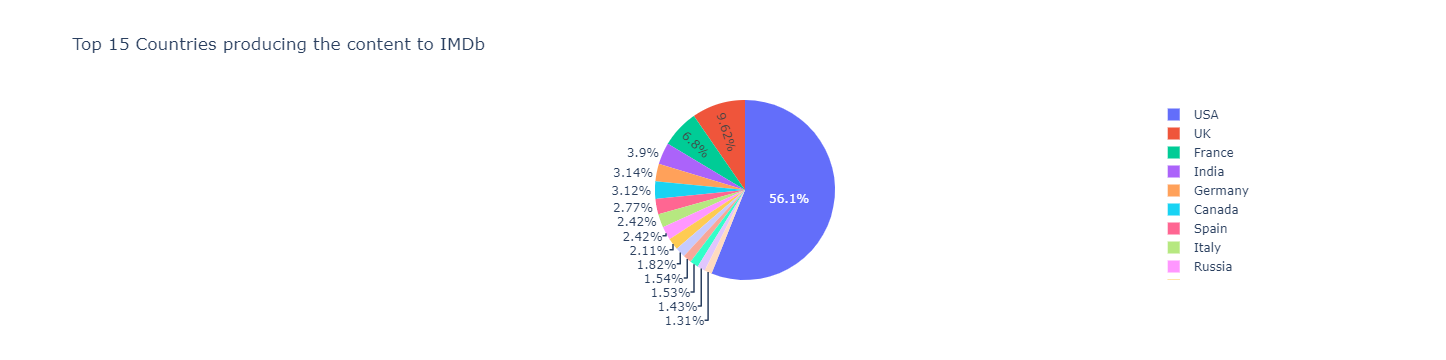

In [252]:
Visualization = px.pie(values=top15countries, 
                       names=top15countries.index,title='Top 15 Countries producing the content to IMDb')

Visualization.show()

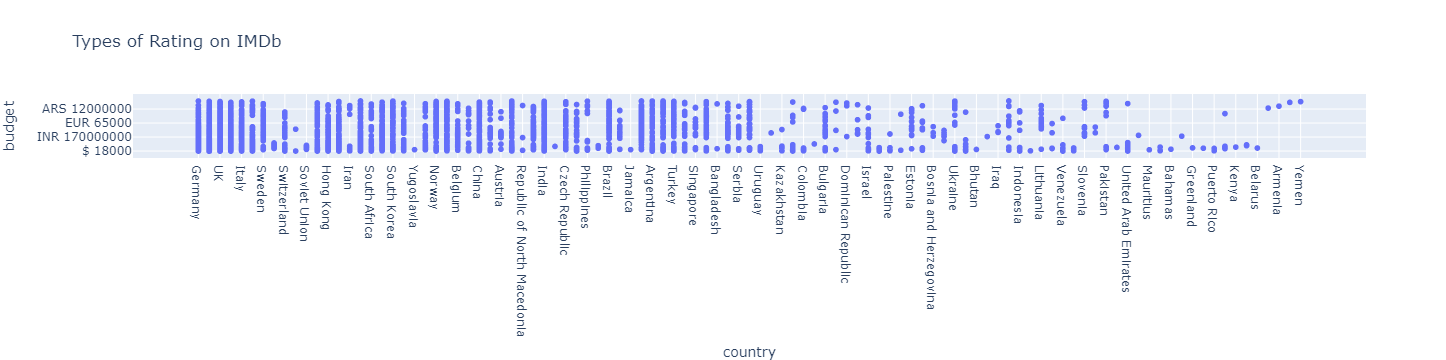

In [253]:
Budget = imdb2['budget'].value_counts()
visual = px.data.tips()

Visualization = px.scatter(imdb2, x="country", y="budget",title='Types of Rating on IMDb')

Visualization.show()

In [87]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', 'USD'))
    return(x)

imdb2['budget'] = imdb2['budget'].apply(clean_currency).astype('str')

imdb2.head()

,imdb_title_id,year,genre,duration,country,language,avg_vote,budget,usa_gross_income,worlwide_gross_income
165,tt0010323,1920,"Fantasy, Horror, Mystery",76,Germany,German,8.1,USD 18000,$ 8811,$ 8811
245,tt0012190,1921,"Drama, Romance, War",150,USA,None,7.2,USD 800000,$ 9183673,$ 9183673
251,tt0012349,1921,"Comedy, Drama, Family",68,USA,"English, None",8.3,USD 250000,No usa_gross_income,$ 26916
348,tt0014624,1923,"Drama, Romance",82,USA,"None, English",7.0,USD 351000,No usa_gross_income,$ 11233
415,tt0015864,1925,"Adventure, Comedy, Drama",95,USA,"English, None",8.2,USD 923000,No usa_gross_income,$ 26916


In [90]:
imdb2['budget'] = imdb2['budget'].astype('str')

imdb3 = imdb2[imdb2.budget.str.contains('USD')]
imdb3['budget']

165         USD 18000
245        USD 800000
251        USD 250000
348        USD 351000
415        USD 923000
             ...     
85477      USD 200000
85530      USD 950000
85592      USD 500000
85740    USD 12000000
85756     USD 1200000
Name: budget, Length: 8999, dtype: object

In [91]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('USD', ''))
    return(x)

imdb3['budget'] = imdb3['budget'].apply(clean_currency).astype('int')

In [92]:
imdb3['budget']

165         18000
245        800000
251        250000
348        351000
415        923000
           ...   
85477      200000
85530      950000
85592      500000
85740    12000000
85756     1200000
Name: budget, Length: 8999, dtype: int32